In [1]:
import pandas as pd

In [2]:
s = pd.Series([2, -3, 51.3, 52])
s

0     2.0
1    -3.0
2    51.3
3    52.0
dtype: float64

In [3]:
import numpy as np
np.exp(s)

0    7.389056e+00
1    4.978707e-02
2    1.902422e+22
3    3.831008e+22
dtype: float64

In [4]:
s_2 = pd.Series([0.4, 9, 324, 13])
s + s_2

0      2.4
1      6.0
2    375.3
3     65.0
dtype: float64

In [5]:
s + 1 # broadcasting

0     3.0
1    -2.0
2    52.3
3    53.0
dtype: float64

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

In [7]:
s_3 = pd.Series([25, 26, 64, 62], index=["Bob", "Alice", "Chris", "Dan"])
s_3

Bob      25
Alice    26
Chris    64
Dan      62
dtype: int64

In [8]:
s_3["Bob"]

25

In [9]:
s_3[0]

25

In [10]:
s_3.loc["Bob"]

25

In [11]:
s_3.iloc[1]

26

In [12]:
slice_2 = s_2.iloc[1:3]

In [13]:
slice_2 # the index didn't change

1      9.0
2    324.0
dtype: float64

In [14]:
heights = {"Bob":89, "Anne":55, "Chris":70, "Dan":100}
s_4 = pd.Series(heights)
s_4

Bob       89
Anne      55
Chris     70
Dan      100
dtype: int64

In [15]:
s_5 = pd.Series(heights, index=["Dan", "Bob"])
s_5

Dan    100
Bob     89
dtype: int64

In [16]:
print(s_3.keys(),"\n", s_4.keys())

s_3 + s_4

Index(['Bob', 'Alice', 'Chris', 'Dan'], dtype='object') 
 Index(['Bob', 'Anne', 'Chris', 'Dan'], dtype='object')


Alice      NaN
Anne       NaN
Bob      114.0
Chris    134.0
Dan      162.0
dtype: float64

In [17]:
s_6 = pd.Series(42, ["Random", "Values", "Everywhere", "Have", "Seed", "Equal", "To"])
s_6

Random        42
Values        42
Everywhere    42
Have          42
Seed          42
Equal         42
To            42
dtype: int64

In [18]:
s_7 = pd.Series(heights, name="Heights")
s_7

Bob       89
Anne      55
Chris     70
Dan      100
Name: Heights, dtype: int64

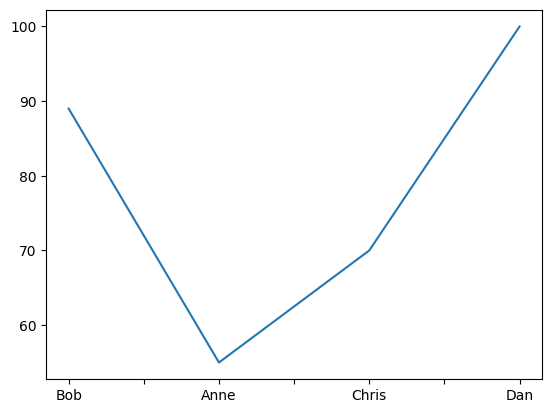

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

s_7.plot()
plt.show()

In [20]:
dates = pd.date_range('1998-07-21 7:20pm', periods=100, freq='9M')
dates[:10]

DatetimeIndex(['1998-07-31 19:20:00', '1999-04-30 19:20:00',
               '2000-01-31 19:20:00', '2000-10-31 19:20:00',
               '2001-07-31 19:20:00', '2002-04-30 19:20:00',
               '2003-01-31 19:20:00', '2003-10-31 19:20:00',
               '2004-07-31 19:20:00', '2005-04-30 19:20:00'],
              dtype='datetime64[ns]', freq='9M')

In [21]:
temperatures = np.array(20 * np.random.rand(100) + 0.45*(np.random.randint(4, size=100))**2 + 5.25*np.random.randint(3, size=100))

<Axes: >

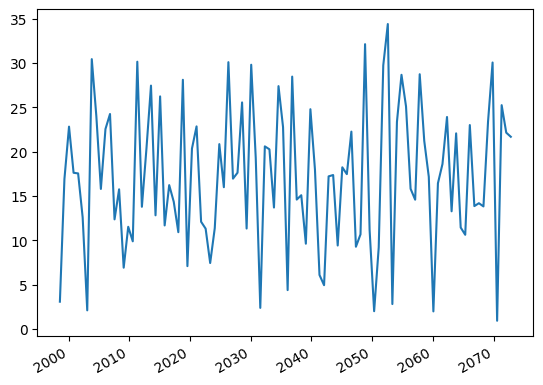

In [22]:
temp_series = pd.Series(temperatures, dates)
temp_series.plot()

If we want to change the sample size, we need to resample.

In [24]:
temp_series_2 = temp_series.resample("5Y").apply(np.min)
temp_series_2

1998-12-31     3.068368
2003-12-31     2.090822
2008-12-31    12.355259
2013-12-31     6.903494
2018-12-31    10.908037
2023-12-31     7.079050
2028-12-31    11.362647
2033-12-31     2.368247
2038-12-31     4.374487
2043-12-31     4.928213
2048-12-31     9.264868
2053-12-31     1.993857
2058-12-31    14.573183
2063-12-31     1.971414
2068-12-31    10.615132
2073-12-31     0.917226
Freq: 5A-DEC, dtype: float64

In [29]:
temp_series_3 = temp_series.resample("6M").mean()
temp_series_3

1998-07-31     3.068368
1999-01-31          NaN
1999-07-31    16.907902
2000-01-31    22.814421
2000-07-31          NaN
                ...    
2071-01-31          NaN
2071-07-31    25.238236
2072-01-31    22.134885
2072-07-31          NaN
2073-01-31    21.669907
Freq: 6M, Length: 150, dtype: float64

In [62]:
temp_series_3a = temp_series.resample("6M").mean().interpolate(method="cubicspline")
temp_series_3a

1998-07-31     3.068368
1999-01-31     8.143537
1999-07-31    16.907902
2000-01-31    22.814421
2000-07-31    21.298554
                ...    
2071-01-31     6.640619
2071-07-31    25.238236
2072-01-31    22.134885
2072-07-31    11.920853
2073-01-31    21.669907
Freq: 6M, Length: 150, dtype: float64

In [63]:
temp_series_4 = temp_series.resample("5Y").apply(np.max)
temp_series_4

1998-12-31     3.068368
2003-12-31    30.429447
2008-12-31    24.237517
2013-12-31    30.137826
2018-12-31    28.099835
2023-12-31    22.840812
2028-12-31    30.087168
2033-12-31    29.796746
2038-12-31    28.458888
2043-12-31    24.780724
2048-12-31    32.116286
2053-12-31    34.389240
2058-12-31    28.726347
2063-12-31    23.902782
2068-12-31    22.993268
2073-12-31    30.049536
Freq: 5A-DEC, dtype: float64

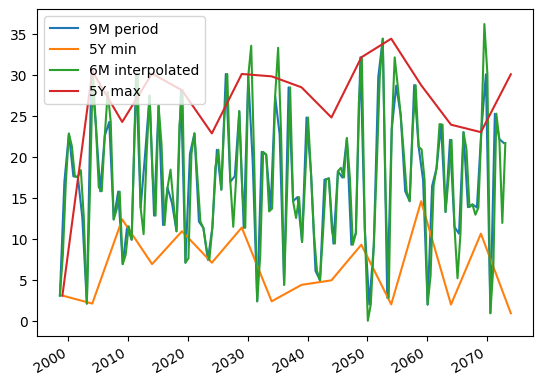

In [64]:
temp_series.plot(label="9M period")
temp_series_2.plot(label="5Y min")
temp_series_3a.plot(label="6M interpolated")
temp_series_4.plot(label="5Y max")

plt.legend()
plt.show()

Time zones

In [72]:
time_series_la = temp_series.tz_localize("America/Los_Angeles")
time_series_la

1998-07-31 19:20:00-07:00     3.068368
1999-04-30 19:20:00-07:00    16.907902
2000-01-31 19:20:00-08:00    22.814421
2000-10-31 19:20:00-08:00    17.608654
2001-07-31 19:20:00-07:00    17.539074
                               ...    
2069-10-31 19:20:00-08:00    30.049536
2070-07-31 19:20:00-08:00     0.917226
2071-04-30 19:20:00-08:00    25.238236
2072-01-31 19:20:00-08:00    22.134885
2072-10-31 19:20:00-08:00    21.669907
Length: 100, dtype: float64

In [73]:
time_series_waw = time_series_la.tz_convert("Europe/Warsaw")
time_series_waw

1998-08-01 04:20:00+02:00     3.068368
1999-05-01 04:20:00+02:00    16.907902
2000-02-01 04:20:00+01:00    22.814421
2000-11-01 04:20:00+01:00    17.608654
2001-08-01 04:20:00+02:00    17.539074
                               ...    
2069-11-01 04:20:00+01:00    30.049536
2070-08-01 04:20:00+01:00     0.917226
2071-05-01 04:20:00+01:00    25.238236
2072-02-01 04:20:00+01:00    22.134885
2072-11-01 04:20:00+01:00    21.669907
Length: 100, dtype: float64